In [1]:
# %matplotlib widget
%matplotlib inline

import os
import numpy as np
import matplotlib.pylab as plt
from pylab import rcParams
rcParams['figure.figsize'] = 13, 8
import pandas as pd
import random
import colorsys

In [2]:
def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

In [7]:
exp_list = [ x  for x in os.listdir('./results') if not '.' in x]
exp_list.sort()

exp_list.pop(0)
# exp_list = [folder for folder in exp_list if 'proto' in folder]
print(exp_list)

['cycle_1_exp1', 'cycle_1_exp2', 'cycle_1_exp3', 'cycle_2_exp1', 'cycle_2_exp2', 'cycle_2_exp3', 'cycle_3_exp1', 'cycle_3_exp2', 'cycle_3_exp3', 'proto_exp1', 'proto_exp2', 'proto_exp3']


cycle_1_exp1: 0.68947
cycle_1_exp2: 0.69333
cycle_1_exp3: 0.69600
cycle_2_exp1: 0.69133
cycle_2_exp2: 0.69867
cycle_2_exp3: 0.68253
cycle_3_exp1: 0.68800
cycle_3_exp2: 0.69213
cycle_3_exp3: 0.69227
proto_exp1: 0.68827
proto_exp2: 0.69520
proto_exp3: 0.69587


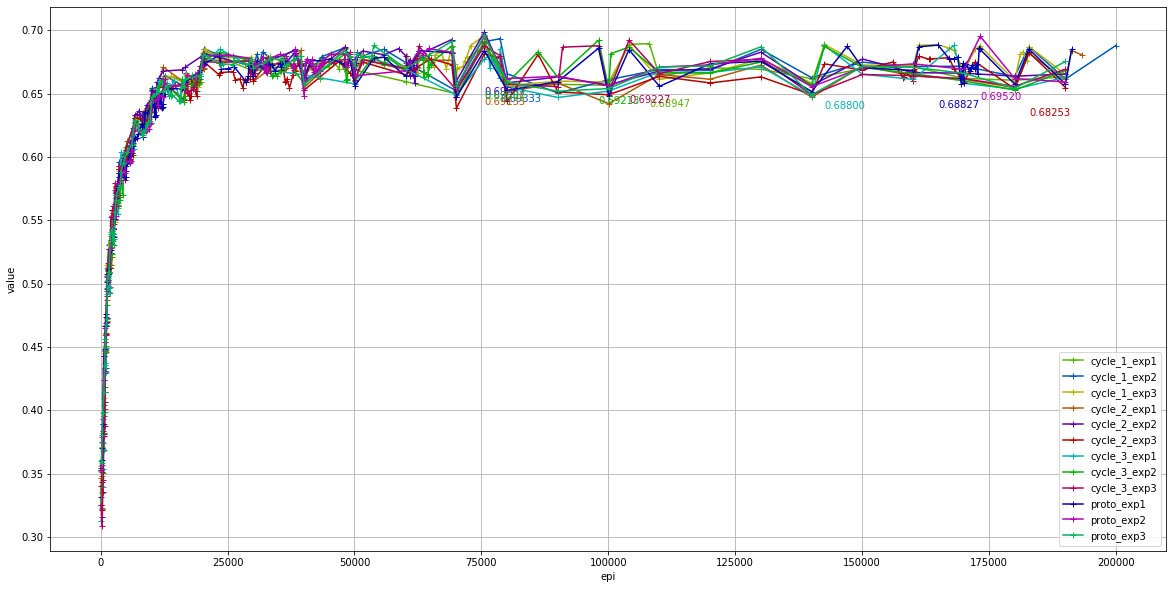

In [8]:
fig = plt.figure(figsize=(20, 10))
colors = random_colors(len(exp_list), bright=False)
for i, exp in enumerate(exp_list):
    with open(os.path.join('results', exp, 'log.txt'), 'r') as f:
        lines = f.readlines()
        steps, loss, acc, loss_orig, loss_reverse = [], [], [], [], []

        for line in lines:
            try:
                line = line.replace('\n','')
                line_split = line.split(' ')
                if len(line_split) == 3:
                    [s, l, ac] = line_split
                else:
                    [s, l, l_o, l_r, ac] = line_split
                    loss_orig.append(float(l_o))
                    loss_reverse.append(float(l_r))
                steps.append(float(s))
                loss.append(float(l))
                acc.append(float(ac))
            except:
                pass
    view = acc
#     view = loss
#     view = loss_reverse
    if len(steps) != len(view):
        continue
    plt.plot(steps, view, '-+', color=colors[i])
    # acc -> True
    flag = (view[0] - view[-1]) < 0
    if flag:
        m_index = np.argmax(view)
        plt.annotate('{:.5f}'.format(np.max(view)), 
                     xy=(steps[m_index], view[m_index]-0.05), color=colors[i])
    else:
        m_index = np.argmin(view)
        plt.annotate('{:.5f}'.format(np.min(view)), 
                     xy=(steps[m_index], view[m_index]+0.05), color=colors[i])
    print('{}: {:.5f}'.format(exp, view[m_index]))
    
labels =[]
for i in exp_list:
    labels.append(i)

plt.legend(labels)
plt.grid()
# plt.ylim([0.4, 1])
# plt.yticks(np.arange(0.4,1,0.1))
plt.xlabel('epi')
plt.ylabel('value')
# plt.xlim([0,50000])
plt.show()


cycle_1 ce 같이 쓴것  
cycle_1 ce 다르게 쓴것  
proto_1  

In [12]:
'{:0>6d}'.format(100100)

'100100'